In [29]:
from scipy.stats import norm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df = pd.read_csv('datasets/df_final_combined_version3.csv')
df.drop(df.tail(300).index,
        inplace = True)

In [30]:
#https://stackoverflow.com/questions/20011122/fitting-a-normal-distribution-to-1d-data
def plot_data(data, mu, std):
    # Plot the histogram.
    plt.hist(data, bins=25, density=True, alpha=0.6, color='g')

    # Plot the PDF.
    xmin, xmax = plt.xlim()
    x = np.linspace(xmin, xmax, 100)
    p = norm.pdf(x, mu, std)
    plt.plot(x, p, 'k', linewidth=2)
    title = "Fit results: mu = %.2f,  std = %.2f" % (mu, std)
    plt.title(title)

    plt.show()

66868.84848484848 68391.28891140346


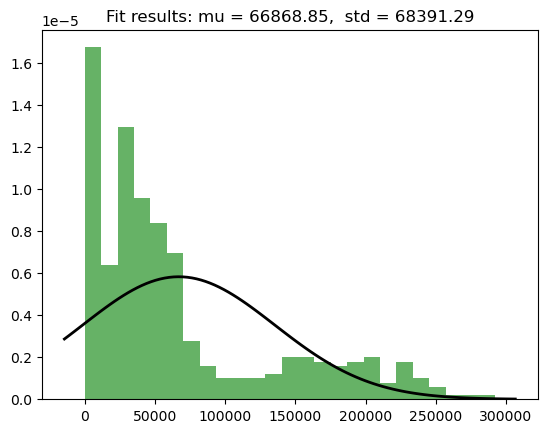

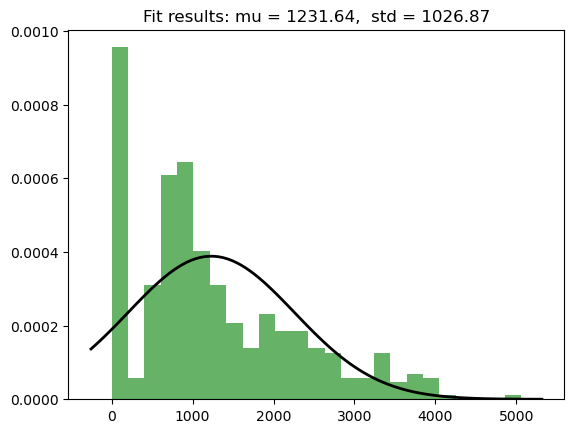

In [34]:
nc_data = df["New_cases"].to_numpy()
norm_nc_mu, norm_nc_std = norm.fit(nc_data)
print(norm_nc_mu, norm_nc_std)
nd_data = df["New_deaths"].to_numpy()
norm_nd_mu, norm_nd_std = norm.fit(nd_data)

plot_data(nc_data, norm_nc_mu, norm_nc_std)
plot_data(nd_data, norm_nd_mu, norm_nd_std)

In [32]:
# Calculate marginal probabilities for every binary column
means = df[["mask","closed_border", "social_restrictions", "space_closures",
   "state_of_emergency", "testing_screening"]].mean(axis=0)

In [33]:
print(means)

mask                   0.752914
closed_border          0.890443
social_restrictions    0.918415
space_closures         0.820513
state_of_emergency     0.818182
testing_screening      0.925408
dtype: float64
